# Keras API Proeject

LendingClub is a US peer-to-peer company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a sceondary market. LendingClub is the world's largest peer-to-peer lending platform.

# Data Overview

Click on the link below for information about this particular dataset
https://www.kaggle.com/code/aonursert/tensorflow-keras-project?scriptVersionId=36290319&cellId=2

# Starter Code

In [1]:
import pandas as pd
# Read the CSV file into a DataFrame
data_info = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_info.csv', index_col='LoanStatNew')

print(data_info.loc['revol_util']['Description'])



Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [14]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
    
feat_info('mort_acc')

Number of mortgage accounts.


# Loading the data and other imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# Section 1: Exploratory Data Analysis

Overall Goal: Get an understanding for which variables are important, view
summary statistics, and visualize the data
Task: Since we will be attempting to predict loan_status, I created a 
countplot as shown below.

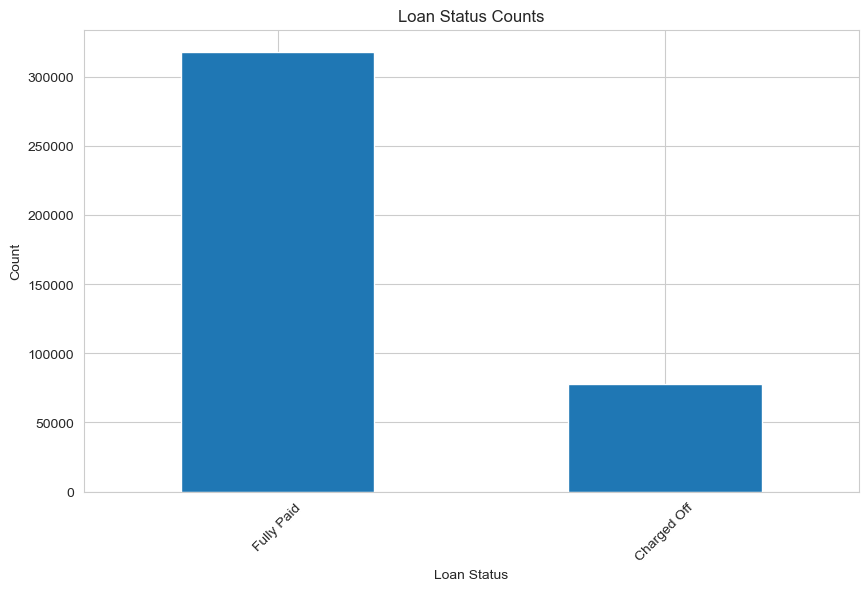

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert "loan_status" to categorical data type
df["loan_status"] = df["loan_status"].astype('category')

# Get the counts of each unique value in "loan_status"
status_counts = df["loan_status"].value_counts()

# Plot the counts using Matplotlib
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar')
plt.title("Loan Status Counts")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# # Task: Create a histogram of the loan_amnt column

C:\Users\Owner\AppData\Local\Temp\ipykernel_3632\3266286701.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["loan_amnt"], kde=False)


<Axes: xlabel='loan_amnt'>

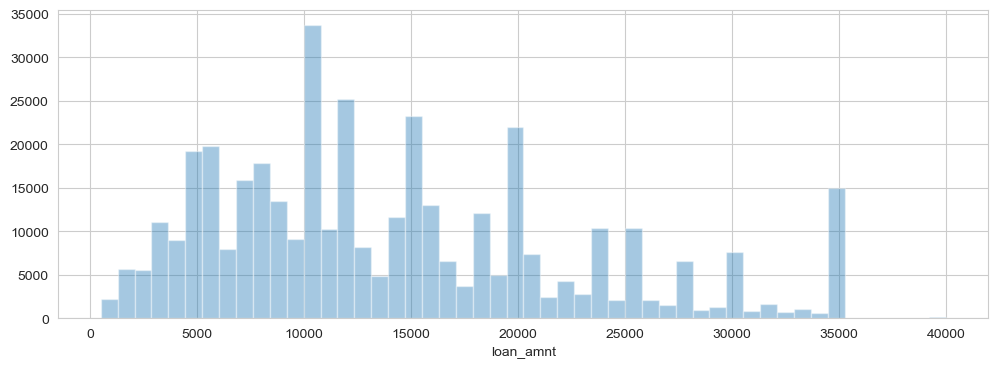

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,4))
sns.distplot(df["loan_amnt"], kde=False)

In [18]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


# Task: Lets explore correlation between the continous numeric  variables. Calculate the correlation between all continous numeric variables using .corr()method.

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')

# Drop columns that are not suitable for modeling or require additional preprocessing
df.drop(columns=['emp_title', 'title', 'issue_d', 'earliest_cr_line', 'address'], inplace=True)

# Convert categorical columns to one-hot encoding
df = pd.get_dummies(df, columns=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
                                  'loan_status', 'purpose', 'initial_list_status', 'application_type'])

# Convert 'sub_grade' column to one-hot encoding
df = pd.get_dummies(df, columns=['sub_grade'])

# Handle missing values
df.fillna(0, inplace=True)  # Filling missing values with 0, you can choose a different strategy if needed

# Now, let's check the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)




              loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt      1.000000  0.168921     0.953929    0.336887  0.016636   
int_rate       0.168921  1.000000     0.162758   -0.056771  0.079038   
installment    0.953929  0.162758     1.000000    0.330381  0.015786   
annual_inc     0.336887 -0.056771     0.330381    1.000000 -0.081685   
dti            0.016636  0.079038     0.015786   -0.081685  1.000000   
...                 ...       ...          ...         ...       ...   
sub_grade_G1   0.039714  0.137912     0.040316    0.004775  0.004517   
sub_grade_G2   0.033544  0.118871     0.034648    0.001699  0.005410   
sub_grade_G3   0.032224  0.104247     0.033163    0.003318  0.003337   
sub_grade_G4   0.027905  0.086611     0.028853    0.005917  0.003607   
sub_grade_G5   0.023786  0.081416     0.024953    0.005291  0.003466   

              open_acc   pub_rec  revol_bal  revol_util  total_acc  ...  \
loan_amnt     0.198556 -0.077779   0.328320    0.100286   0.

# Task: Visualization using Heatmap

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/Tensorflow/TensorForge_KeraScript/lending_club_loan_two.csv')

# Drop rows with non-numeric values in columns that should be numeric
numeric_columns = ['term', 'emp_length']
df = df.dropna(subset=numeric_columns)

# Convert 'term' column to numerical values
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

# Convert categorical columns to numerical values
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['grade'] = df['grade'].map(grade_mapping)

# Convert 'emp_length' to numerical values
def convert_emp_length(x):
    if pd.isnull(x):
        return x
    elif '+' in x:
        return 10
    elif '<' in x:
        return 0
    else:
        return int(x.split()[0])

df['emp_length'] = df['emp_length'].apply(convert_emp_length)

# Convert non-numeric columns to categorical or drop them
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
for col in non_numeric_columns:
    if col in ['issue_d', 'earliest_cr_line']:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    else:
        df = df.drop(columns=[col])

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()






__Task: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there's duplicate information here?__

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')

# Get information about the 'installment' column
installment_info = df['installment'].describe()
print(installment_info)


In [ ]:
feat_info('loan_amnt')

<Axes: xlabel='installment', ylabel='loan_amnt'>

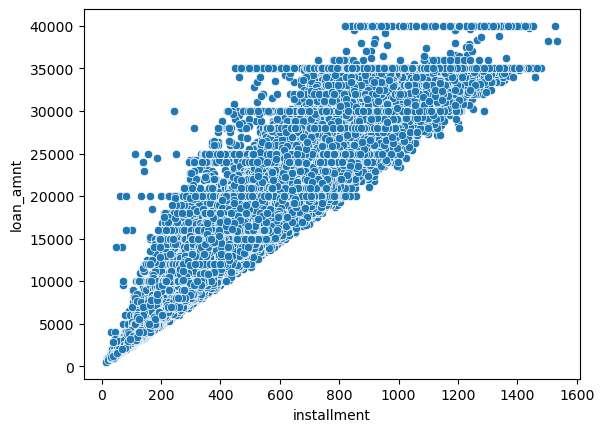

In [5]:
sns.scatterplot(x="installment", y="loan_amnt", data=df)

Task: Create a boxplot showing the relationship between the loan_status and the Loan Amount.

In [ ]:
import seaborn as sns
import pandas as pd
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')
sns.boxplot(x="loan_status", y="loan_amnt", data=df)

__Task: Calculate the Summary statistics for the loan amount, grouped by the loan_status.__

In [ ]:
df.groupby("loan_status")["loan_amnt"].describe()

__Task: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

In [ ]:
df.head()

In [ ]:
import numpy as np
np.sort(df["grade"].unique())

In [ ]:
np.sort(df["sub_grade"].unique())

__Task: Create a countplot per grade. Set the hue to the loan_status label__

<Axes: xlabel='grade', ylabel='count'>

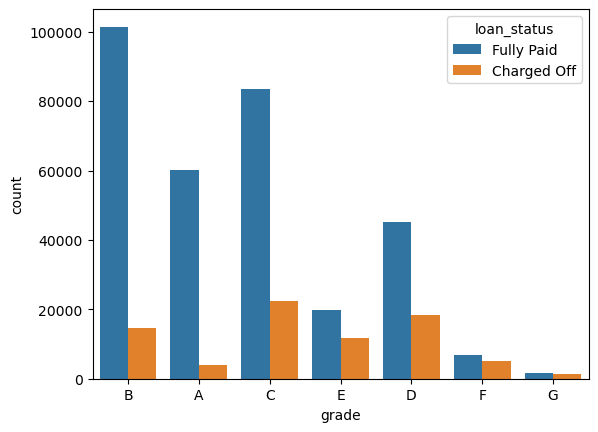

In [6]:
sns.countplot(x="grade", hue="loan_status", data=df)

__Task: Display a count plot per subgrade. You may need to resize for this plot and reorder the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x="sub_grade", data=df, palette="coolwarm", order=np.sort(df["sub_grade"].unique()))

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="sub_grade", hue="loan_status", data=df, palette="coolwarm", order=np.sort(df["sub_grade"].unique()))

__Task: It looks like F and G subgrades don't get paid back that often. Isolate those and recreate the countplot just for those subgrades__

In [ ]:
df_FG = df[(df["grade"] == "F") | (df["grade"] == "G")]
plt.figure(figsize=(12,6))
sns.countplot(x="sub_grade", hue="loan_status", data=df_FG, palette="coolwarm", order=np.sort(df_FG["sub_grade"].unique()))

__Task: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [ ]:
df["loan_repaid"] = pd.get_dummies(df["loan_status"], drop_first=True)
df.head()

__Challenge Task: Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.__

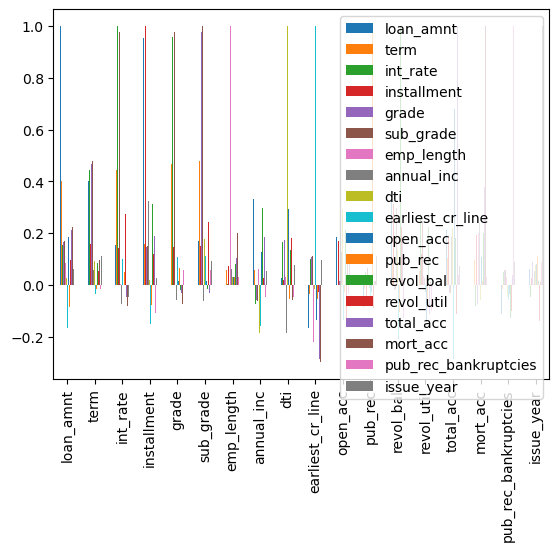

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')

# Drop rows with missing values in the DataFrame
df.dropna(inplace=True)

# Preprocess 'term' column
df['term'] = df['term'].astype(str).str.replace(' months', '').astype(int)

# Apply label encoding to 'grade' and 'sub_grade' columns
label_encoder = LabelEncoder()
df['grade'] = label_encoder.fit_transform(df['grade'])
df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])

# Apply label encoding to 'emp_length' column
df['emp_length'] = df['emp_length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10})

# Convert 'earliest_cr_line' to year
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y').dt.year

# Extract year from 'issue_d' and convert to integer
df['issue_year'] = pd.to_datetime(df['issue_d'], format='%b-%Y').dt.year

# Drop columns with non-numeric values
non_numeric_cols = ['emp_title', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'initial_list_status', 'application_type', 'address', 'issue_d']
df.drop(non_numeric_cols, axis=1, inplace=True)

# Check if target variable exists
target_variable = 'loan_repaid'
if target_variable in df.columns:
    # Plot correlation for target variable
    df.corr()[target_variable][:-1].sort_values().plot(kind="bar")
else:
    # Plot correlation among all numeric features
    df.corr().plot(kind="bar")

plt.show()









# Section 2: Data PreProcessing

__Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.__

In [ ]:
df.head

# Missing Data

__Let's explore the missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard or fill in the missing data.__

__Task: What is the length of the dataframe?__

In [ ]:
import pandas as pd
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')
len(df)

__Task: Create a Series that displays the total count of missing values per column.__

In [8]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
annual_inc              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
mort_acc                0
pub_rec_bankruptcies    0
issue_year              0
dtype: int64

__Task: Convert this Series to be in term of percentage of the total DataFrame__

In [9]:
import pandas as pd
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')
df.isnull().mean()

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004434
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
dtype: float64

__Task: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook__

In [ ]:
import pandas as pd
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')
def feat_info(feature_name):
    # Define a dictionary containing information about features
    feature_info = {
        'emp_title': 'Employer title',
        'emp_length': 'Employment length in years',
        # Add more feature descriptions as needed
    }
    
    # Print information about the specified feature
    print(feature_info.get(feature_name, 'Feature not found'))

# Now you can use the feat_info function
feat_info("emp_title")
print()
feat_info("emp_length")

__Task: How many unique employment job titles are there?__

In [ ]:
df["emp_title"].nunique()

In [ ]:
df["emp_title"].value_counts()

__Task: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.__

In [ ]:
df.drop("emp_title", axis=1, inplace=True)

__Task: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.__

In [ ]:
df["emp_length"].dropna().unique()

In [ ]:
sorted(df["emp_length"].dropna().unique())

<Axes: xlabel='emp_length', ylabel='count'>

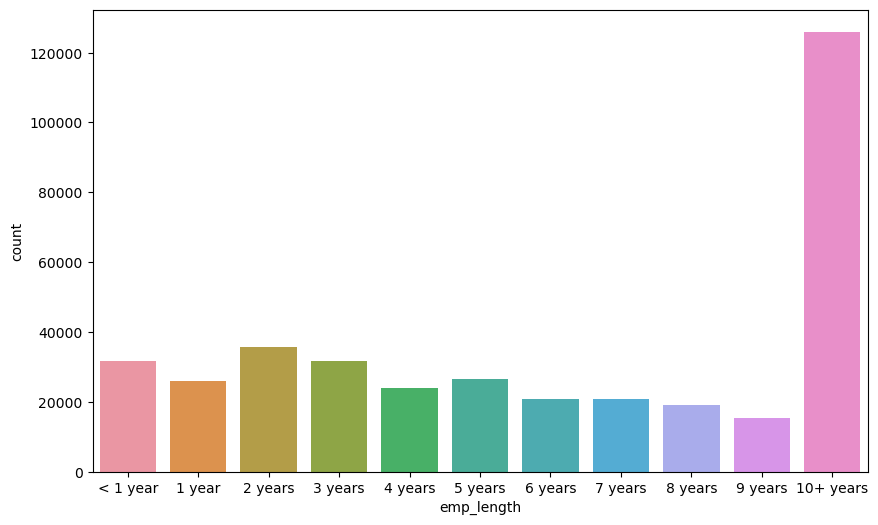

In [10]:
sort_emp = ['< 1 year',
'1 year',
'2 years',
'3 years',
'4 years',
'5 years',
'6 years',
'7 years',
'8 years',
'9 years',
'10+ years']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x="emp_length", data=df, order=sort_emp)

__Task: Plot out the counplot with a hue separating Fully Paid vs Charged Off__

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x="emp_length", data=df, order=sort_emp, hue="loan_status")

__Challenge Task: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, What we want is the percentage of charge offs per category. Esssentially informing us what percent of people per employment category didn't pay back their loan. The are a multitude of ways to create this series. Once you've created it visualize it with a bar plot.__

In [ ]:
emp_co = df[df["loan_status"]=="Charged Off"]. groupby("emp_length").count()["loan_status"]
emp_fp = df[df["loan_status"]=="Fully Paid"].groupby("emp_length").count()["loan_status"]
emp_co/emp_fp    
    


In [ ]:
emp_len = emp_co / (emp_co + emp_fp)
emp_len.plot(kind="bar")

__Task: Charge off rates are extrememly similar across all employment lengths. Go ahead and drop the emp_length column.__

In [ ]:
df.drop("emp_length", axis=1, inplace=True)

__Task: Revisit the Dataframe to see what feature columns still have missing data.__

In [ ]:
df.isnull().sum()

__Task: Review the title column vs the purpose column. Is this repeated infromation__

In [ ]:
df["purpose"].head()

In [ ]:
feat_info("purpose")

In [ ]:
df["title"].head(10)

In [ ]:
feat_info("title")

__Task: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.__

In [ ]:
df.drop("title", axis=1, inplace=True)

__Task: Find out what the mort_acc feature represents__

In [ ]:
feat_info("mort_acc")

__Task: Create a value_counts of the mort_acc column__

In [ ]:
df["mort_acc"].value_counts()

__Task: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set Nan as its own category. There is no 100% correct approach. Lets reveiw the other columns to see which most highly correlates to mort_acc.__

In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation between "mort_acc" and other numeric columns, and sort the results
correlation_with_mort_acc = numeric_columns.corr()["mort_acc"].sort_values()

# Display the sorted correlations
print(correlation_with_mort_acc)


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64


__Task: Looks like the total_acc feature correlates with the mort_acc, this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:__

In [3]:
total_acc_avg = df.groupby("total_acc")["mort_acc"].mean()
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [4]:
import numpy as np
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
    
df["mort_acc"] = df.apply(lambda x: fill_mort_acc(x["total_acc"], x["mort_acc"]), axis=1)
df["mort_acc"].isnull().sum()

0

In [12]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

# Categorical Variables and Dummy Variables

__We're done working with missing data! Now we just need to deal with the string values due to the categorical columns.__
__Task: List all the columns that are currently non-numeric.__

In [ ]:
df.select_dtypes(["object"]).columns

__Let's now go through all the string features to see what we should do with them.__
term feature
__Task: Convert the term feature into either a 36 or 60 integer numeric data type using.apply() or .map().

In [ ]:
feat_info("term")

In [ ]:
df["term"].value_counts()

In [ ]:
df["term"] = df["term"].apply(lambda x: int(x.split()[0]))
df["term"]

In [ ]:
df["term"].value_counts()

grade feature
__Tasks: We already know grade is part of sub_grade, so just drop the grade feature.__

In [ ]:
df.drop("grade", axis=1, inplace=True)

__Task: Convert the subgrade into dummy variables. Then concentrate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call__

In [ ]:
import pandas as pd
dummies = pd.get_dummies(df["sub_grade"], drop_first=True)
dummies

In [ ]:
df.drop("sub_grade", axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)
df.head

In [ ]:
df.columns

In [ ]:
df.select_dtypes(["object"]).columns

verification_status, application_type, initial_list_status,purpose
__Task: Convert these columns: ['verification_status','application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.__

In [ ]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

home_ownership
__Task: Review the value_counts for the home_ownership column.__

In [ ]:
df["home_ownership"].value_counts()

__Task: Convert these dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE,RENT,OWN,OTHER.Then Cocatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.

In [ ]:
df["home_ownership"] = df["home_ownership"].replace(["NONE", "ANY"], "OTHER")
df["home_ownership"].value_counts()

In [ ]:
dummies = pd.get_dummies(df["home_ownership"], drop_first=True)
df.drop("home_ownership", axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

address
__Task: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.__

In [ ]:
df["address"]

In [ ]:
df["zipcode"] = df["address"].apply(lambda x: x[-5])


In [ ]:
df["zipcode"].value_counts()

__Task: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.__

In [ ]:
dummies = pd.get_dummies(df["zipcode"], drop_first=True)
df.drop("zipcode", axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

In [ ]:
df.drop("address", axis=1, inplace=True)

issue_d
__Task: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.__

In [ ]:
feat_info("issue_d")

In [ ]:
df.drop("issue_d", axis=1, inplace=True)

__Task: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.__

In [ ]:
feat_info("earliest_cr_line")

In [ ]:
df["earliest_cr_line"]

In [ ]:
df["earliest_cr_year"] = df["earliest_cr_line"].apply(lambda x: int(x.split("-")[1]))

In [ ]:
df.head()

In [ ]:
df.drop("earliest_cr_line", axis=1, inplace=True)

In [ ]:
df.select_dtypes(["object"]).columns

# Train Test Split

__Task: Import train_test_split from sklearn.__

In [ ]:
from sklearn.model_selection import train_test_split

__Task: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.__

In [ ]:
df["loan_status"]

In [ ]:
import pandas as pd

# Assuming you have loaded your DataFrame df from a CSV file or some other source

# Perform some operations to determine the values of the new column 'loan_repaid'
# For example, let's say you want to create a new column based on whether 'loan_status' is 'Fully Paid' or not
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

# Now, the 'loan_repaid' column should have been created with values 1 for 'Fully Paid' loans and 0 otherwise
print(df['loan_repaid'].value_counts())

In [ ]:
df.drop("loan_status", axis=1, inplace=True)

In [ ]:
df.select_dtypes(["object"]).columns

In [ ]:
X = df.drop("loan_repaid", axis=1).values

In [ ]:
y = df["loan_repaid"].values

# Normalizing the Data

__TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakage from the test set so we only fit on the X_train data.__

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test - scaler.transform(X_test)

# Creating the model

__Task: Run the cell below to import the necessary Keras functions.__

__Task: Build a sequential model that will be used for training on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron.__

__Task: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting.__

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')

# Data preprocessing
# Drop rows with missing values
df = df.dropna()

# Encode the target variable
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

# Convert 'term' column to numerical format
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

# Separate features (X) and target (y)
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Convert target to NumPy array
y = y.values.astype('float32')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(79, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam")

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

from tensorflow.keras.models import load_model

model.save('keras_project.h5')



Epoch 1/25


C:\Users\Owner\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 79), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


1050/1050 [==============================] - 1654s 2s/step - loss: 0.4613 - val_loss: 0.4460
Epoch 2/25
1050/1050 [==============================] - 3004s 3s/step - loss: 0.3543 - val_loss: 0.5083
Epoch 3/25
1050/1050 [==============================] - 2057s 2s/step - loss: 0.1509 - val_loss: 0.7679
Epoch 4/25
1050/1050 [==============================] - 1873s 2s/step - loss: 0.0423 - val_loss: 1.1896
Epoch 5/25
1050/1050 [==============================] - 1833s 2s/step - loss: 0.0172 - val_loss: 1.4543
Epoch 6/25
1050/1050 [==============================] - 2031s 2s/step - loss: 0.0116 - val_loss: 1.5060
Epoch 7/25
1050/1050 [==============================] - 1853s 2s/step - loss: 0.0080 - val_loss: 1.7180
Epoch 8/25
1050/1050 [==============================] - 1846s 2s/step - loss: 0.0075 - val_loss: 1.6860
Epoch 9/25
1050/1050 [==============================] - 1843s 2s/step - loss: 0.0062 - val_loss: 1.7614
Epoch 10/25
1050/1050 [==============================] - 2357s 2s/step - lo

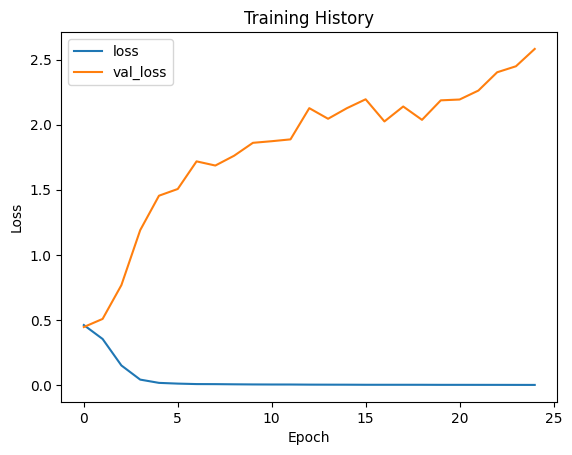

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided training log
training_log = {
    'loss': [0.4613, 0.3543, 0.1509, 0.0423, 0.0172, 0.0116, 0.0080, 0.0075, 0.0062, 0.0052,
             0.0047, 0.0046, 0.0037, 0.0034, 0.0032, 0.0026, 0.0026, 0.0026, 0.0025, 0.0021,
             0.0021, 0.0020, 0.0019, 0.0017, 0.0015],
    'val_loss': [0.4460, 0.5083, 0.7679, 1.1896, 1.4543, 1.5060, 1.7180, 1.6860, 1.7614, 1.8604,
                 1.8728, 1.8869, 2.1266, 2.0451, 2.1262, 2.1947, 2.0246, 2.1393, 2.0368, 2.1866,
                 2.1929, 2.2616, 2.4021, 2.4482, 2.5814]
}

# Convert training log to DataFrame
losses = pd.DataFrame(training_log)

# Plot the training history
losses.plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.show()


__Task: Create Predictions from X_test set and display a classification report and conclusion matrix for the X_test set.__

In [19]:
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the saved model
loaded_model = load_model('C:/Users/Owner/anaconda3/envs/tf-gpu/keras_project.h5')

# Load test data from CSV file
test_data = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')

# List of column names
columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
           'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
           'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
           'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
           'revol_util', 'total_acc', 'initial_list_status', 'application_type',
           'mort_acc', 'pub_rec_bankruptcies', 'address']

# Target column
target_column = 'loan_status'

# Extract feature columns by removing the target column
feature_columns = [col for col in columns if col != target_column]

# Extract features (X_test) from test data using feature columns
X_test = test_data[feature_columns]

# Extract the target column (y_test) from test data
y_test = test_data[target_column]

# Preprocessing pipeline
numeric_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
                    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                    'mort_acc', 'pub_rec_bankruptcies']

categorical_features = ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
                        'home_ownership', 'verification_status', 'issue_d', 'purpose',
                        'title', 'earliest_cr_line', 'initial_list_status',
                        'application_type', 'address']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing pipeline to X_test
X_test_preprocessed = preprocessor.fit_transform(X_test)

# Reduce the number of components for TruncatedSVD
n_components = 100  # Adjust this value as needed
svd = TruncatedSVD(n_components=n_components)

# Transform the preprocessed data using TruncatedSVD
X_test_svd = svd.fit_transform(X_test_preprocessed)

# Now you can use loaded_model for making predictions
predictions = loaded_model.predict(X_test_svd)

# Print classification report
print(classification_report(y_test, predictions))

# Print confusion matrix
print(confusion_matrix(y_test, predictions))






MemoryError: Unable to allocate 517. MiB for an array with shape (616518, 110) and data type float64

Exception ignored in: 'scipy.linalg._decomp_lu_cython.lu_decompose'
Traceback (most recent call last):
  File "C:\Users\Owner\anaconda3\envs\tf-gpu\lib\site-packages\scipy\linalg\_decomp_lu.py", line 313, in lu
    lu_dispatcher(a1, u, p, permute_l)
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 517. MiB for an array with shape (616518, 110) and data type float64


MemoryError: Unable to allocate 332. MiB for an array with shape (110, 396030) and data type float64